In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd


file_path = '/content/drive/MyDrive/cs-project dataset/soil fertility data.csv'
df = pd.read_csv(file_path)
df.head()


,N,ph,sand,silt,cec,bulk density,clay,soc,fertility
0,138,7.46,70.79417,30.293500,27.964874,1.615436,35.369125,0.70,0
1,213,7.62,70.87520,30.041927,27.964874,1.615436,35.503357,1.06,0
2,163,7.59,70.14587,32.473793,28.522726,1.615436,34.093960,1.11,0
3,157,7.64,69.82172,33.312370,28.801651,1.615436,33.825500,0.94,0
4,220,7.43,70.14587,33.228510,28.894629,1.615436,33.557050,0.72,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             1288 non-null   int64  
 1   ph            1288 non-null   float64
 2   sand          1288 non-null   float64
 3   silt          1288 non-null   float64
 4   cec           1288 non-null   float64
 5   bulk density  1288 non-null   float64
 6   clay          1288 non-null   float64
 7   soc           1288 non-null   float64
 8   fertility     1288 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 90.7 KB


In [10]:
df.describe()

,N,ph,sand,silt,cec,bulk density,clay,soc,fertility
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,269.061335,7.549130,72.053327,30.913122,30.398473,1.627976,33.831548,0.632174,1.035714
std,80.542499,0.507163,2.173759,1.835678,3.258430,0.025487,2.156670,0.720488,0.810938
min,6.000000,0.900000,68.363045,25.681343,24.059917,1.555034,26.040268,0.100000,0.000000
25%,207.000000,7.340000,70.632095,29.538784,28.429752,1.611409,32.953020,0.390000,0.000000
50%,289.000000,7.500000,71.847650,30.628931,29.638428,1.623490,34.362415,0.620000,1.000000
75%,333.000000,7.700000,73.063210,32.222220,31.404959,1.643624,35.302013,0.832500,2.000000
max,383.000000,11.150000,80.356570,36.582810,42.469010,1.691946,38.389260,24.000000,2.000000


In [11]:

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             1288 non-null   int64  
 1   ph            1288 non-null   float64
 2   sand          1288 non-null   float64
 3   silt          1288 non-null   float64
 4   cec           1288 non-null   float64
 5   bulk density  1288 non-null   float64
 6   clay          1288 non-null   float64
 7   soc           1288 non-null   float64
 8   fertility     1288 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 90.7 KB
None

Summary Statistics:
                 N           ph         sand         silt          cec  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean    269.061335     7.549130    72.053327    30.913122    30.398473   
std      80.542499     0.507163     2.173759     1.835678     3.258430   
min       6.000000     0.900000  

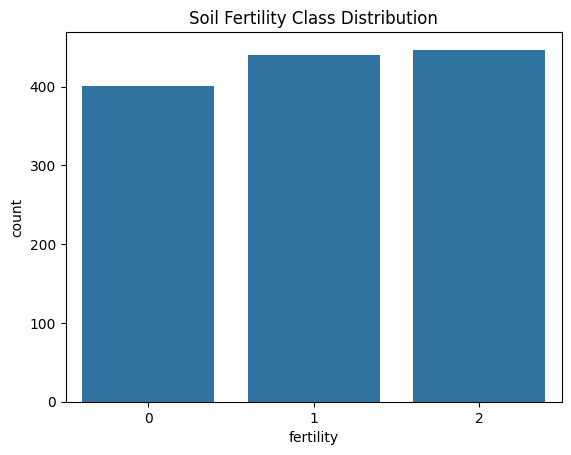

In [12]:
# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check class distribution
print("\nClass Distribution (Output):")
print(df['fertility'].value_counts())

# Visualize class distribution
sns.countplot(x='fertility', data=df)
plt.title('Soil Fertility Class Distribution')
plt.show()


# **Data Preprocessing**

In [18]:
# Define features and target
X = df.drop(columns=['fertility'])
y = df['fertility']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for later use
joblib.dump(scaler, 'soil_scaler.pkl')


['soil_scaler.pkl']

# ***rf model training***

Accuracy of the Model: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.96      0.92      0.94        88
           2       0.95      0.99      0.97        90

    accuracy                           0.96       258
   macro avg       0.96      0.96      0.96       258
weighted avg       0.96      0.96      0.96       258


Confusion Matrix:


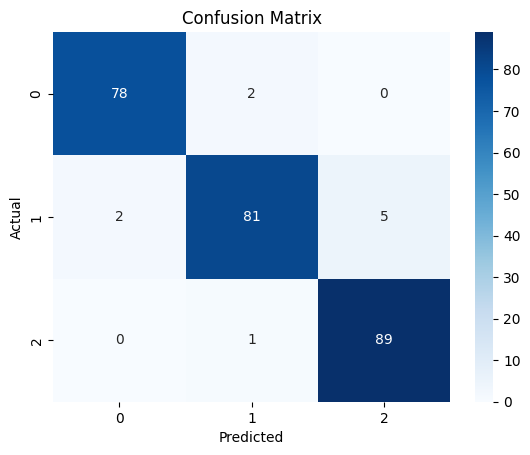

In [14]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
# Save the trained Random Forest model
joblib.dump(rf_model, 'soil_fertility_model.pkl')
print("Model saved as 'soil_fertility_model.pkl'")


Model saved as 'soil_fertility_model.pkl'


In [19]:
import pandas as pd
import numpy as np
import joblib

# Load the scaler and model
scaler = joblib.load('soil_scaler.pkl')
model = joblib.load('soil_fertility_model.pkl')

# Example input (replace with real values and ensure they match the feature names)
feature_names = ['N', 'ph', 'sand', 'silt', 'cec', 'bulk density', 'clay', 'soc']
example_input = pd.DataFrame([[138,7.46,70.79, 30.29, 27.96, 1.615, 35.37, 0.7]],
                             columns=feature_names)

# Scale the input
scaled_input = scaler.transform(example_input)

# Make prediction
prediction = model.predict(scaled_input)
print(f"Predicted Output (Soil Fertility): {prediction[0]}")

# Map predictions to descriptive labels and crop recommendations
fertility_mapping = {
    0: {"status": "Low Soil Fertility",
        "crops": ["Millets", "Sorghum", "Legumes", "Cassava"]},
    1: {"status": "Moderate Soil Fertility",
        "crops": ["Maize", "Wheat", "Barley", "Groundnuts"]},
    2: {"status": "Highly Fertile Soil",
        "crops": ["Rice", "Sugarcane", "Vegetables", "Fruits"]}
}

# Get the descriptive result and recommended crops
fertility_status = fertility_mapping.get(prediction[0], {"status": "Unknown", "crops": []})
status = fertility_status["status"]
recommended_crops = fertility_status["crops"]

# Display the result
print(f"Predicted Soil Fertility: {status}")
print("Recommended Crops:")
for crop in recommended_crops:
    print(f"- {crop}")


Predicted Output (Soil Fertility): 0
Predicted Soil Fertility: Low Soil Fertility
Recommended Crops:
- Millets
- Sorghum
- Legumes
- Cassava
